# What would today's Asian American population be if Japanese Americans were deported rather than interned in 1942?

Colin Takeda and Nathan Weil
ModSim Project 1


In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *

from pandas import read_html

import csv

## Question

What would today's Asian American population be if Japanese Americans were deported rather than interned in 1942?

What would be today's percent population of Asian Americans be if all other races increased naturally as well?

## Model

Inputs: 
- Asian American population in 1942 - total number of Japanese Americans interned
- Populations of other races in 1942

Data: 
- Populations of other races over time

Actions: 
- Simulate change in population over time per race and plot

Metrics: 
- Growth over time of each subset of population 
- Percent change for Asian Americans over time

In [204]:
'''This section is for Data input'''

data = pd.read_csv('data/api_simple.csv', index_col='time')

'''
# Dates for historical data
data_time = [1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010]

# Population Data
api = [254918, 321033, 980337, 1526401, 3500439, 7273662, 10641833, 15214265]

for i in range(0, 8):
    data[data_time[i]] = api[i]

'''

data = data/(1e6)

print(data)

time = TimeSeries()



            pop
time           
1940   0.254918
1950   0.321033
1960   0.980337
1970   1.526401
1980   3.500439
1990   7.273662
2000  10.641833
2010  15.214265
Series([], dtype: float64)


In [3]:
def plot_results(data, results, title):
    
    plot(data, '-', label='API Population')
    plot(results, '-', label='Model API Population')

    decorate(xlabel='Year', 
             ylabel='Population (millions)',
             title=title)

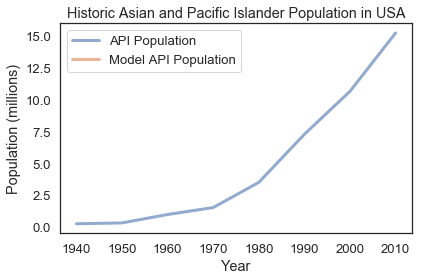

In [4]:
empty = TimeSeries()
plot_results(data, empty, 'Historic Asian and Pacific Islander Population in USA')

In [187]:
system = System (alpha = 0.0747, beta = -.0032
                 , p_0 = 0.13, t_0 = 1940, t_end = 2010)

,values
alpha,0.0747
beta,-0.0032
p_0,0.1300
t_0,1940.0000
t_end,2010.0000


15.214265
11.105347852310459


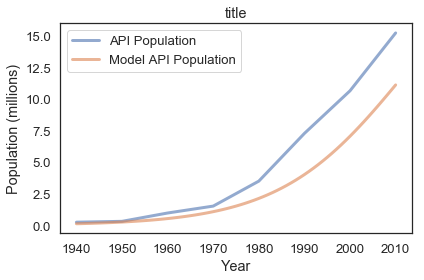

In [190]:
def run_simulation (update_func, system):
    results = TimeSeries()
    results[system.t_0] = system.p_0
    
    for t in linrange (system.t_0, system.t_end):
        
        results[t+1] = update_func(results[t], system)
        # print(results[t+1])
    return results

def update_func(pop, system):
    
    net_growth = system.alpha * pop + system.beta * pop**2
    population = pop + net_growth
    
    return population

results = run_simulation(update_func, system)
plot_results(data, results, "title")

print(data[2010])
print(results[2010])

## Results

We expect a much smaller Asian American percentage of the population over time if the interned Japanese Americans had ben deported. This data can be verified by projecting it to the 2010 census data. 

## Interpretation 

plot(results)